# Module 2: Probability and Statistics

The sections present in this chapter are listed below. Feel free to navigate as you like: <br>

**1. Why Probability?** <br>
**2. Random Variables** <br>
**3. Probability Distributions** <br>
**4. Marginal Probability** <br>
**5. Conditional Probability** <br>
**6. The Chain Rule of Conditional Probabilities** <br>
**7. Independence and Conditional Independence** <br>
**8. Expectation, Variance and Covariance** <br>
**9. Common Probability Distributions** <br>
**10. Bayes' Theorem** <br>
**11. Bayesian Networks** <br>

### 1. Why Probability?
Although Computer Scientists and Software Engineers deal mostly with entities that are entirely deterministic, Machine Learning makes heavy use of probability theory. The main reason for this being that Machine Learning must always deal with quantities which are either uncertain or [stochastic](https://en.wikipedia.org/wiki/Stochastic)  
(non-deterministic). The possible sources of uncertainty are:
- Inherent stochasticity in the system being modelled: For example, creating theoretical scenarios such as a hypothetical card game where we assume that the cards are truly shuffled into a random order.

- Incomplete observability: When we cannot observe all the variables that drive the behaviour of a system, even deterministic systems can become stochastic, e.g. the [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) where the outcome given the contestant's choice is deterministic, but from the point of view of the contestant, the outcome is uncertain.

- Incomplete modelling: When we use a model that must discard some of the information that we have observed, the discarded information leads to an uncertainty in the model predictions.

There are two types of kinds of probability:
- **Frequentist Probability**: Probability theory was originally developed to analyze the frequencies of events (which are often repeatable, e.g. drawing a certain hand of cards in a poker game). When we say that an outcome has a probability p of occuring, it means that if we repeated the experiment infinte times, then proportion p of those repititions would produce that outcome. This kind of probability, rerelated directly to the rates at which events occur, is called frequentist probability.


- **Bayesian Probability**: The above reasoning doesn't seem applicable to experiments which are not repeatable, e.g. when a doctor says that a patient has 40% chance of having the flu, the probability represents a **degree of belief**, with 1 indicating absolute certainty that the patient has the flu and 0 indicating absoluting certainty that the patient doesn't have the flu. This kind of probability, related to qualitative levels of reasoning, is called **Bayesian Probability**.

However, in order to satisfy the properties that we expect common sense reasoning about uncertainty to have, we treat both Bayesian and frequentist probabilities as exactly the same. For example, the probability that a player will win a poker game given he/she has a certain set of cards is calculated in the exact same manner as the probability that a patient has a certain disease given that he/she has certain symptoms.

### 2. Random Variables
A **random variable** is a variable, e.g. x, that can take on different values (states) randomly. Since it takes on values randomly, there must be a probability associated with each of those values. Thus, a random variable must be coupled with a **probability distribution** that specifies how likely each of the states are.

There are two types of random variables:
- Discrete: The number of states are finite or [countably infinite](https://en.wikipedia.org/wiki/Countable_set).
- Continuous: It is associated with a real value.

More details on these in the next section.

### 3. Probability Distributions

A **probability distribution** is a description of how likely a random variable or a set of random variables is, to take on each of its possible states. For example, if the random variable x can take values $\{1,2\}$, then $Pr(\text{x}= 1) = 0.4$ specifies the probability distribution of x, where the probability of x taking the value 1 is 0.4 and the probability of x taking the value 2 is 0.6. Probability distributions are described based on whether the random variable is discrete or continuous.

#### 3.1 Discrete Variables and Probability Mass functions
The probability distribution over discrete random variables is described using a **probability mass function** (PMF). Along with its random variable, it is denoted as: x ~ $P(\text{x})$. 
Note that $P(x)$ denotes $P(\text{x} = x)$, which is the probability that x = $x$. A probability mass function acting over multiple variables is called a **joint probability distribution**. $P(\text{x} = x, \text{y} = y)$ denotes the probability that x = $x$ and y = $y$ simultaneously. 

For a function $P$ to be a PMF, it must satisfy these conditions:

- The [domain](https://en.wikipedia.org/wiki/Domain_of_a_function) of P must be all possible states of x.
- $\forall x \in $ x, $ 0 \leq P(x) \leq 1$
- $ \sum_{x \in \text{x}} P(x) = 1$ (normalization)

For example, the uniform distribution on a random variable x with $k$ different states is given by: 
<br> <br>
$$ P(\text{x} = x_i) = 1/k $$

To arrive at this, let we use the normalization condition:

$$ \sum_{i = 1}^{k} P(x_i) = 1 $$

In a uniform distribution, all the states have the same probability (say p). Thus, we get:
$$ kp = 1 $$
$$ \Rightarrow p = 1/k $$

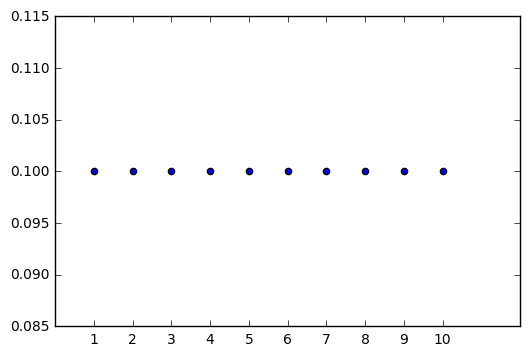

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
k = 10
x = range(1, k+1)
prob = [float(1)/k] * k
plt.scatter(x, prob)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

#### 3.2 Continuous variables and Probability Density Functions
We describe probability distributions using a **probability density function** (PDF) (denoted by $p$) when working with continuous random variables. $p$ must satisfy the following conditions to be a PDF:
- The domain of $p$ should be all the possible states of x.
- $\forall x \in$ x, $p(x) \geq 0$ i.e. $p(x)$ can be greater than 1.
- $\int p(x)dx = 1$

It's important to understand here that $p(x)$ doesn't give the probability of a specific state. The probability of landing inside an infinitesimal region with volume $\delta x$ is given by $p(x)\delta x$. Thus, the probability that $x$ lies in the interval $[a,b]$ is given by: $\int_{[a,b]} p(x)dx$. The diagram below better illustrates this.
![pdf](http://slideplayer.com/slide/8387312/26/images/12/The+Probability+Density+Function.jpg)

For example, consider a uniform distribution on an interval of real numbers. This is denoted by: $ x \sim U(a, b) $ <br>
The corresponding function $u(x; a,b)$ (";" denoting "parameterized by") is given by:

$$ 
\\ 
u(x; a,b) = 
     \begin{cases}
       \frac{1}{b-a} &\quad \text{for } x \in [a, b]\\
       0 &\quad otherwise
     \end{cases}
\\
$$

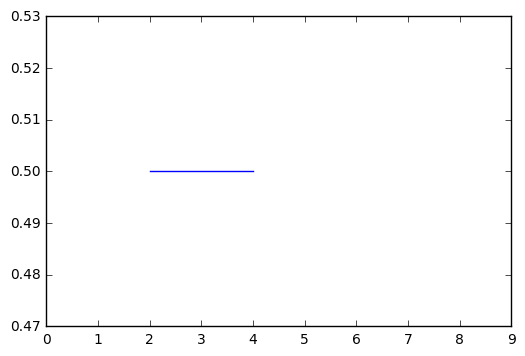

In [31]:
import matplotlib.pyplot as plt
import numpy as np

a = 2
b = 4

value = float(2) / 4
x = [a, b]
y = [value, value]
plt.plot(x, y)
plt.xticks(range(10))
plt.show()

### 4. Marginal Probability

Sometimes we know the probability distribution over a set of variables and need to find the probability over just a subset of them. The probability over the subset is called **marginal probability distribution**.

For example, if we know $P(\text{x}, \text{y})$, we can find $P(\text{x})$ as:
$$ \forall x \in \text{x}, P(\text{x} = x) = \sum_{y} P(\text{x} = x, \text{y} = y)$$

This image better illustrates how we calculate marginal probabilities: <br> <br>
<img src="https://dlsun.github.io/probability/bookdown-demo_files/figure-html/marginal-x-1.png" alt="drawing" width="500"/>

### 5.  Conditional Probability

This is one of the most important concept in probability theory. Sometimes we are interested in calculating the probability of some event (X) , "conditioned" on the knowledge that another event (Y) has happened. It is denoted by $P(X \hspace{.1cm}| \hspace{.1cm} Y)$. For example, at the beginning of a class, the probability that a student will score well on a subject is the same for all the students. But if we are given that a particular student does well on most of his subjects, then the probability that the student will score well, given that the student scores well on most of his subjects, increases. It can be computed by the formula:

$$ P(\text{y} = y \hspace{.1cm}| \hspace{.1cm} \text{x} = x) = \frac{P(\text{y} = y , \text{x} = x)}{P(\text{x} = x)} $$

The conditional probability is defined only when $P(\text{x} = x) > 0$ as we can't condition on an event that never occurs.

### 6. The Chain Rule of Conditional Probabilities

Any joint probability distribution over many random variables may be decomposed into conditional distributions over only one variable. Let's take a simple example before we look at the general expression. From the definition of conditional probability, we have: $ P(\text{b}, \text{c}) = P(\text{b} \hspace{.1cm} | \hspace{.1cm} \text{c}) P(\text{c}) $. <br>
We want to decompose $P(\text{a}, \text{b}, \text{c})$. Applying the formula for conditional probability to $P(\text{a}, \text{b}, \text{c})$, we get:

$$ P(\text{a}, \text{b}, \text{c}) = P(\text{a} \hspace{.1cm} | \hspace{.1cm} \text{b}, \text{c})P(\text{b}, \text{c}) $$
$$\Rightarrow P(\text{a}, \text{b}, \text{c}) = P(\text{a} \hspace{.1cm} | \hspace{.1cm} \text{b}, \text{c})P(\text{b} \hspace{.1cm} | \hspace{.1cm} \text{c}) P(\text{c})
$$

The general expression is given by:
$$P(\text{x}^{(1)}, ..., \text{x}^{(n)}) = P(\text{x}^{(1)}) \prod_{i=2}^{n} P(\text{x}^{(i)} \hspace{.1cm} | \hspace{.1cm} \text{x}^{(1)},..., \text{x}^{(i-1)}) $$

### 7. Independence and Conditional Independence
Two random variables x & y are said to be **independent** (x $\perp$ y) if they satisfy: <br> <br>
$$ \forall x \in \text{x}, y \in \text{y}, P(\text{x} = x, \text{y} = y) = P(\text{x} = x)P(\text{y} = y) $$

Using the definition of conditional probability, this implies: <br> <br>
$$ P(\text{x} = x, \text{y} = y) = P(\text{x} = x \hspace{.1cm} | \hspace{.1cm}  \text{y} = y)P(\text{y} = y)=  P(\text{x} = x)P(\text{y} = y)$$
$$ \Rightarrow P(\text{x} = x \hspace{.1cm} | \hspace{.1cm}  \text{y} = y)=  P(\text{x} = x)$$
<br>
Similarly, $P(\text{y} = y \hspace{.1cm} | \hspace{.1cm}  \text{x} = x)=  P(\text{y} = y) $. However, this scenario rarely occurs. The more commonly observed phenomenun is that of **conditional independence**. Two random variables x & y are said to be conditional independent (x $\perp$ y | z) given a random variable z if: <br> <br>
$$ \forall x \in \text{x}, y \in \text{y}, \forall z \in \text{z}, P(\text{x} = x, \text{y} = y \hspace{.1cm} | \hspace{.1cm}  \text{z} = z) = P(\text{x} = x \hspace{.1cm} | \hspace{.1cm} \text{z} = z)P(\text{y} = y \hspace{.1cm} | \hspace{.1cm} \text{z} = z) $$

### 8. Expectation, Variance and Covariance

The **expectation**, or **expected value**, of some function $f(x)$ with respect to a probability distribution $P(x)$ is the average, or mean value, that the function $f$ takes on, when $x$ is drawn from $P$. For discrete variables this can be computed with a summation: <br> <br>
$$ \mathbb{E}_{x \sim P}[f(x)] = \sum_{x} P(x)f(x) $$ 

For continuous variables, it is computed with an integral:
$$ \mathbb{E}_{x \sim p}[f(x)] = \int p(x)f(x) $$

The expectation of $f(x)$ is simply represented as $\mathbb{E}[f(x)]$. Expectations are linear: <br> <br>
$$ \mathbb{E}_{x}[\alpha f(x) + \beta g(x)] = \alpha \mathbb{E}_{x}[f(x)] + \beta \mathbb{E}_{x}[g(x)]$$

**Variance** gives a measure of how much the values of random variable x vary (denoted by $\sigma$). It is given by: <br> <br>
$$ Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] $$

The image below shows how the probability distribution of a Gaussian (explained later) varies with the variance. Lower the variance, more peakier the distribution. The square root of variance is called **standard deviation**.
<img src="https://images.deepai.org/glossary-terms/variance-2917933.jpg" alt="drawing" width="500"/>

**Correlation** measures how two variables are linearly related. **Covariance** additionally measures the scale of the variables as well. High values of correlation indicate that the variables are far from their respective means. A positive values indicate that both the variables tend to take high values simultaneously, whereas a negative value indicates that when one of the variables takes a high value, the other one tends to take a lower value. Covariance is given by:  <br> <br>
$$ Cov(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])] $$

Covariance and independence and related but distinct concepts. Independence implies zero covariance, but zero covariance doesn't necessarily imply independence. Hence, independence is a stronger condition. 

**Covariance matrix** of a random vector $\boldsymbol{x} \in \mathbb{R} ^{n}$ is an $n$ x $n$ matrix denoted by $\Sigma$, such that:
$$ Cov(x)_{i, j} = Cov(x_i, x_j), i \neq j$$
$$ Cov(x)_{i, i} = Var(x_i)$$
![cov matrix](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6BwYwUXKlhcgBdq8hwYybgFuBqMgLSxqCSwUDBaEXMoXm0ryS)

### 9. Common Probability Distributions

#### 9.1 Bernoulli Distribution
The Bernoulli distribution is a distribution over a single binary random variable. It is controlled by a single parameter $\phi \in [0,1]$, which gives the probability of the random variable being equal to 1. For e.g., in the event of tossing a coin, $p$ represents the probability that a heads shows up (Assuming heads is represented by 1). <br>
**Properties**:
- $P (x = 1) = \phi $ <br>
- $P (x = 0) = 1 − φ$ <br>
- $P (\text{x} = x) = \phi^x(1 − \phi)^{1−x}$ <br>
- $E_x[x] = \phi$ <br>
- $Var_x(x) = \phi(1 − \phi)$ 

#### 9.2 Multinoulli Distribution
The Multinoulli distribution is similar to the Bernoulli distribution, with the difference being that the discrete random variable can have k different states. It is parameterized by a vector $\boldsymbol{p} \in [0,1] ^{k-1}$, where $p_i$ indicates the probability of the $i^{th}$ state. The final $k^{th}$ state is given by $(1 - \boldsymbol{1}^T \boldsymbol{p})$ where $\boldsymbol{1}^T \boldsymbol{p} \leq 1$.  <br>

#### 9.3 Gaussian Distribution 

The most widely used distribution over real numbers is the **normal** or **gaussian distribution**: <br> <br>
$$ \mathcal{N}(x; \mu, \sigma) = \sqrt{\frac{1}{2 \pi \sigma^2}} exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$$

where $\mu$ is the mean (or peak value) of the distribution and $\sigma^2$ denotes the variance. Feel free to play around with the values of *variance* and *mu* in the snippet below to see how the parameters effect the distribution. 
![gaussian](images/gaussian.jpg)

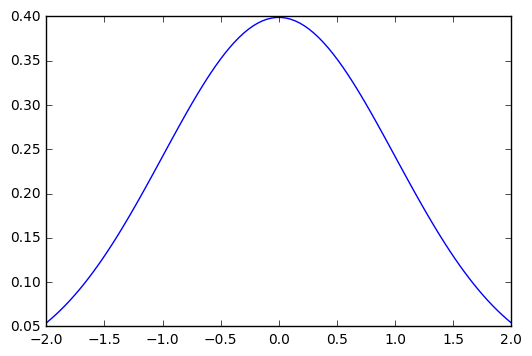

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab

mu = 0.0   # mean of the distribution
variance = 1  # standard deviation

sigma = np.sqrt(variance)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In the absence of any prior knowledge about the distribution, the normal distribution is a good choice, owing to the **central limit theorem** (which states that the sum of many indepedent random variables is approximately normally distributed) and the fact that the normal distribution encodes the most uncertainty over the real numbers among all other probability distributions with the same variance.

Generalizing to $\mathbb{R}^n$, the mean $\boldsymbol{\mu}$ becomes a vector and the variance is replaced by the covariance matrix $\boldsymbol{\Sigma}$, which is often fixed to be a diagonal matrix. 
![normal multivariate](https://i.stack.imgur.com/EOyQI.png)



#### 9.4 Exponential and Laplace distributions

To place a sharp peak at x = 0, we can use the **exponential distribution**:
$$ p(x; \lambda) = \lambda \hspace{.05cm} exp(-\lambda x), \forall x \geq 0$$

Thus, the probability for $x < 0$ is 0. A similar function that allows to place a peak at x = $\mu$ is the **Laplace distribution**: <br> <br>
$$p(x; \mu, \gamma) = \frac{1}{2 \gamma} \hspace{.05cm} exp(-\frac{|x-\mu|}{\gamma})$$

#### 9.5 The Dirac Distribution and Empirical Distribution

The Dirac delta function is defined such that it is zero everywhere except 0, where its value is 1.
$$ 
\\ 
\delta(x) = 
     \begin{cases}
       1 &\quad x = 0\\
       0 &\quad otherwise
     \end{cases}
\\
$$

It can be visualized as a gaussian distribution with mean and variance as 0. 
![dirac delta](http://www.chebfun.org/examples/complex/img/Hyperfuns_01.png)

Suppose we want to define a probability distribution with all the masss centered on one value (say $\mu$), we can define $p(x)$ as:
$$ p(x) = \delta (x-\mu)$$

A common use of the Dirac delta distribution is as a component of an **empirical distribution**:
$$ \hat{p}(\boldsymbol{x}) = \frac{1}{m}\sum_{i=1}^{m} \delta(\boldsymbol{x} - \boldsymbol{x}^{(i)}) $$

This assigns a probability mass of 1/m to each of the m points $\boldsymbol{x}^{(i)}, i=1, 2, ... m$. This is because putting $\boldsymbol{x} = \boldsymbol{x}^{(i)}$ in the above equation will result in only one non-zero term.

####  9.6 Mixtures of distributions

We can define probability distributions by combining other simpler probability distributions. One such way is to construct a **mixture distribution**. On each trial, the choice of which component distribution should generate the sample is determined by sampling a component identity from a multinoulli distribution:

$$ P(x) = \sum_{i} P(c = i) P (x \hspace{.1cm} | \hspace{.1cm} c = i) $$

where $P (c)$ is the multinoulli distribution over component identities. An important concept introduced here is that of a **latent variable**, which is a random variable that we cannot observe directly. In the given case, $c$ is a latent variable. The distribution $P (x \hspace{.1cm} | \hspace{.1cm} c = i) $, relating the latent variable to the visible variable, determines the shape of the distribution $P(x)$, even thoughit is possible to describe $P(x)$ without reference to the latent variable.

A very powerful type of mixture model is the **Gaussian Mixture model (GMM)**, where each of the component distributions is a gaussian, with a **prior probability** associated with each gaussian. The word “prior” indicates that it expresses the model’s beliefs about $c$ *before* it has observed $x$. <br>
$P(c \hspace{.1cm} | \hspace{.1cm} x)$ is a **posterior probability**, because it is computed *after* observation of x. A Gaussian mixture model is a **universal approximator** of densities, in the sense that any smooth density can be approximated with any speciﬁc non-zero amount of error by a Gaussian mixture model with enough components.

### 10. Bayes' Theorem

A lot of times, we actually have $P(y \hspace{.1cm} | \hspace{.1cm} x)$ and we need to find $P(x \hspace{.1cm} | \hspace{.1cm} y)$. **Bayes' Rule** helps us to compute that quantity:

$$ P(x \hspace{.1cm} | \hspace{.1cm} y) = \frac{P(x)P(y \hspace{.1cm} | \hspace{.1cm} x)}{P(y)} $$

where $P(y) = \sum_x P(x)P(y \hspace{.1cm}  | \hspace{.1cm} x)$. Bayes' Rule is one of most important concepts in probability theory.

### 11. Bayesian Networks

A Bayesian network is a probabilistic graphical model which represents a set of variables and their conditional dependencies using a directed acyclic graph. Bayesian Network can be used to many cases such as follows.

<ul>
    <li>Represent the relationship between multiple events</li>
    <li>Prediction</li>
    <li>Anomaly detection</li>
    <li>Time series prediction</li>
    <li>etc.</li>
</ul>

Bayesian Network consist of TWO part
<ul>
    <li>Direct Acyclic Graph (DAG)</li>
    <li>Table of Conditional Probability </li>
</ul>
<img src=".\images\dag1.png"></img>
<ul>
    <li> <b>Node</b> represents the random variables</li>
    <li> <b>Arc</b> represent the conditional probabilities between random variables </li>
</ul>
Let $x_1$, $x_2$, $x_3$, ..., $x_n$ as variables, then the probabilities of a different combination of $x_1$, $x_2$, $x_3$, ..., $x_n$ is called <b>Joint Probability Distribution.
<br/>
<br/>
$$ P(X_i|X_{i-1}, ..., X_1) = P(X_i|\text{Parents}(X_i)) $$